In [1]:
# === Development Environment ===
"""
Python version:       3.7.13 
pandas version:       1.3.4
scikit-learn version: 1.0.2
scipy version:        1.7.3
matplotlib version: 3.5.1
seaborn version: 0.11.2
"""

'\nPython version:       3.7.13 \npandas version:       1.3.4\nscikit-learn version: 1.0.2\nscipy version:        1.7.3\nmatplotlib version: 3.5.1\nseaborn version: 0.11.2\n'

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import confusion_matrix
import glob
import re

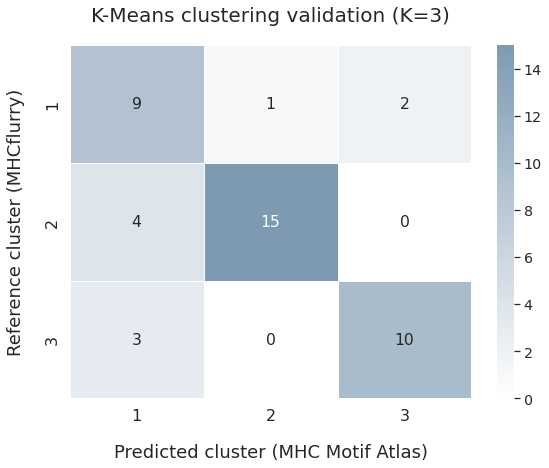

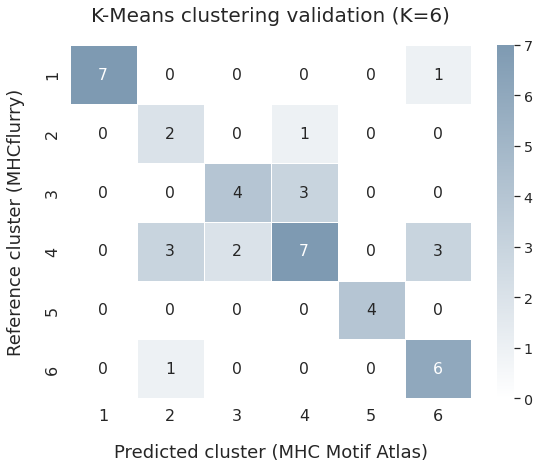

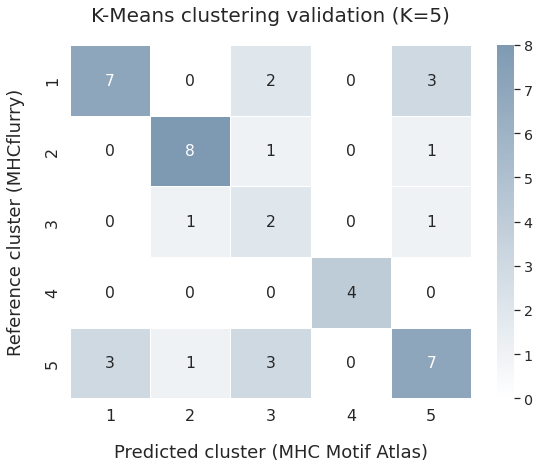

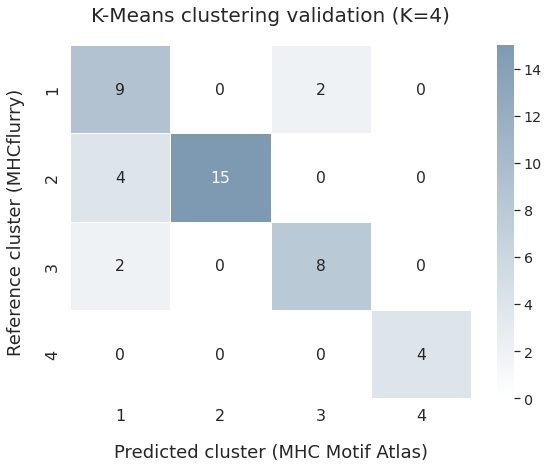

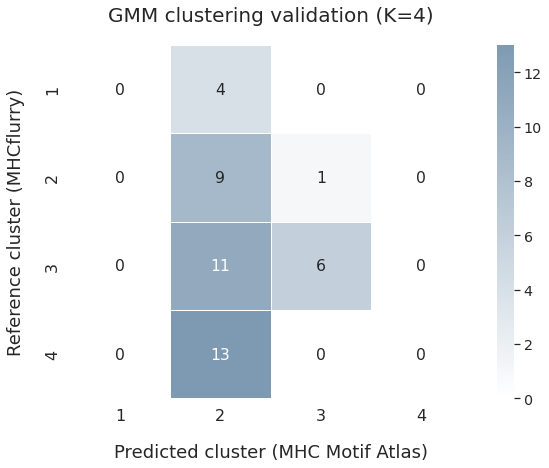

In [3]:
# === Global Style Config ===
plt.rcParams["font.family"] = "Dejavu Sans"
plt.rcParams['pdf.fonttype'] = 42
sns.set(font_scale=1.3)
colors = ["#FFFFFF", "#7E9AB2"] 

custom_cmap = LinearSegmentedColormap.from_list("custom", colors)

# === Load and Plot Each Confusion Matrix ===
files = glob.glob("../results/*_pred_vs_true.csv") #run src/KMeans.py + src/gmm_clustering.py + src/validation.py

for file in files:
    df = pd.read_csv(file)
    model_name = os.path.basename(file).replace("_pred_vs_true.csv", "")

    # Adjust cluster labels to start from 1 (optional but looks nicer)
    df["clusters_y_new"] = df["clusters_y"] + 1
    df["clusters_x_new"] = df["clusters_x"] + 1

    max_x = df["clusters_x_new"].max()
    max_y = df["clusters_y_new"].max()
    K = max(max_x, max_y)
    
    #cm = confusion_matrix(df["clusters_y_new"], df["clusters_x_new"])
    #cluster_labels = sorted(df["clusters_x_new"].unique())
    
    # === Plot ===
    plt.figure(figsize=(9, 6.5))
    all_labels = list(range(1, K + 1))
    cm = confusion_matrix(df["clusters_y_new"], df["clusters_x_new"], labels=all_labels)

    heatmap = sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap=custom_cmap,
        xticklabels=all_labels,
        yticklabels=all_labels,
        linewidths=0.5
    )
    annot_kws={"size": 16, "weight": "regular"}
    
    model_type = "Unknown"
    k_value = "?"

    if "kmeans" in model_name.lower():
        model_type = "K-Means"
    elif "gmm" in model_name.lower():
        model_type = "GMM"

    match = re.search(r'(\d+)cluster', model_name)
    if match:
        k_value = match.group(1)
    #cbar.ax.tick_params(labelsize=16)
    # Set title automatically
    plt.title(f'{model_type} clustering validation (K={k_value})', fontweight='regular', y=1.05, fontsize=20)
    #plt.title(f'Confusion matrix of {model_name} validation',
              #fontweight='bold', y=1.05, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xticks(weight='regular', fontsize=16)
    plt.yticks(weight='regular', fontsize=16)
    plt.xlabel('Predicted cluster (MHC Motif Atlas)', fontsize=18, fontweight='regular', labelpad=20)
    plt.ylabel('Reference cluster (MHCflurry)', fontsize=18, fontweight='regular', labelpad=20)

    for text in heatmap.texts:
        text.set_fontweight('regular')

    cbar = heatmap.collections[0].colorbar
    cbar.ax.yaxis.label.set_weight('regular')
    plt.setp(cbar.ax.get_yticklabels(), fontweight='regular')

    # Save
    plt.savefig(f"figures/{model_name}_confmat.png", dpi=300, transparent=True, bbox_inches='tight')
    plt.savefig(f"figures/pdf/{model_name}_confmat.pdf", dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()